# Домашнее задание №1

### Николаев Евгнеий Алексеевич, группа 22.М08-мм.

Градационные преобразования:
    
- негатив; 
- линейные; 
- логарифмические;
- степенные;
- кусочно-линейные.

## Добавление необходимых для выполнения задания библиотек

In [17]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

## Функция вывода и преобразования изображения

In [29]:
def b2r(orig, func, **kwargs):
    img = cv2.imread(orig) # считывание изображения
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV считывает изображения в формате BGR (вместо RGB), поэтому поменяем цветовой формат на RGB
    
    hist, bins = np.histogram(img, bins=256, range=(0, 256)) # Вычисление гистограммы изначального изображения
    
    plt.figure(figsize=(12, 12), dpi=200)
    plt.subplot(2,2,1); 
    plt.imshow(img,cmap='gray') # вывод изначального изображения
    plt.title("Изначальное изображение")
    
    plt.subplot(2,2,2)
    plt.hist(img.flatten(), bins=256, range=(0, 256)) # Построение гистограммы изначального изображения
    plt.title("Гистограмма")
    plt.xlabel('Значение пикселя (уровень яркости)')
    plt.ylabel('Количество пикселей')
    
    img2 = func(img, **kwargs)
    hist_equ, bins_equ = np.histogram(img2, bins=256, range=(0, 256)) # Вычисление гистограммы преобразованного изображения
    cdf_equ = hist_equ.cumsum()
    cdf_normalized_equ = cdf_equ*float(hist_equ.max())/cdf_equ.max()
    
    
    plt.subplot(2,2,3)
    plt.imshow(img2, cmap='gray') # вывод преобразованного изображения
    plt.title("Преобразованное изображение")
    
    
    plt.subplot(2,2,4)
    plt.hist(img2.flatten(), bins=256, range=(0, 256)) # Построение гистограммы преобразованного изображения
    plt.title("Гистограмма")
    plt.xlabel('Значение пикселя (уровень яркости)')
    plt.ylabel('Количество пикселей')

## Реализация

### Преобразование изображения в негатив

Негативное преобразование определяется выражением s = L - 1 - r.
В нашем случае (RGB) диапазон [0, L-1] = [0, 255].

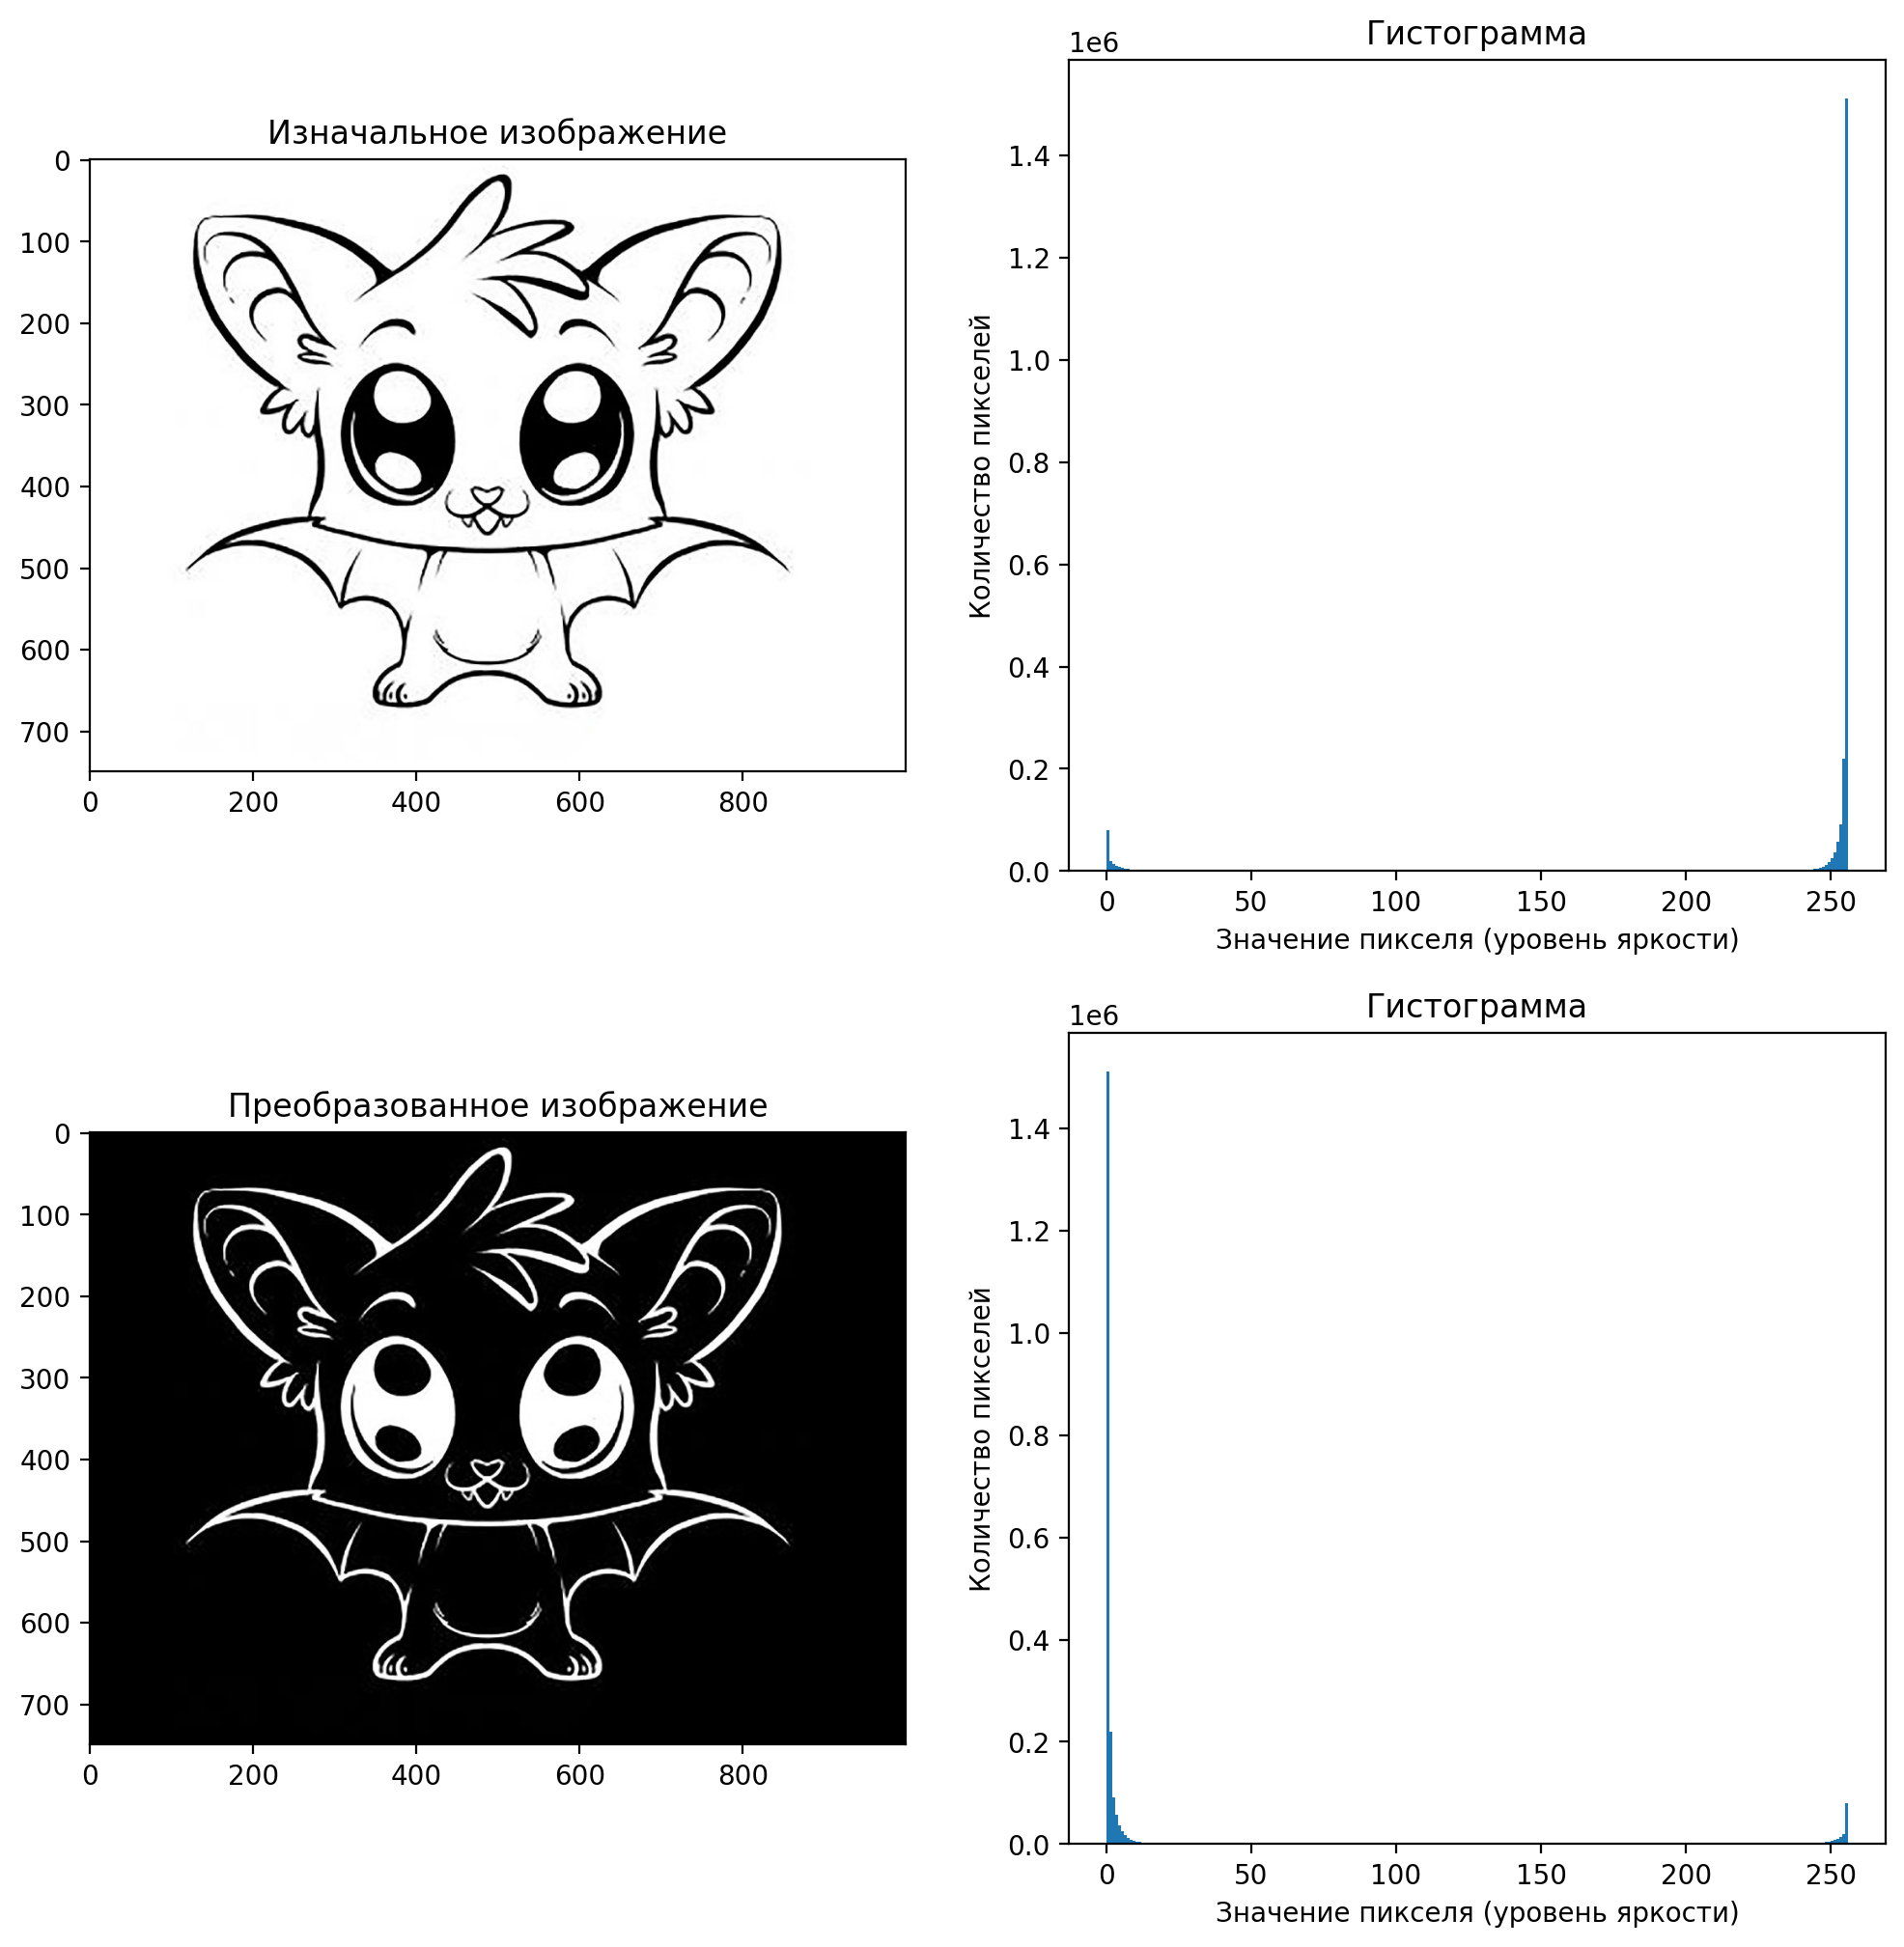

In [30]:
def negative(image):
    return 255 - image

b2r('img1.jpeg', negative)

В данном коде будет выполнено отрицательное преобразование изображения. Функция negative принимает на вход изображение в виде массива image и возвращает массив, в котором каждый пиксел инвертирован. То есть, яркость каждого пиксела в выходном изображении будет равна 255 минус яркость соответствующего пиксела в исходном изображении. Например, если яркость пиксела в исходном изображении равна 100, то в выходном изображении яркость этого же пиксела будет равна 155 (255 - 100).

Функция b2r загружает изображение из файла img1.jpeg, применяет к нему функцию negative и выводит на экран исходное и преобразованное изображения, а также гистограммы яркости для каждого изображения. Таким образом, на экране мы увидим изображение в отрицательном представлении, где цвета инвертированы.

### Логарифмическое преобразование

Логарифмическое преобразование выражается формулой s = clg(1 + r),
где с - константа масштабирования и предполагается, что r (входное значение пикселя) >= 0.
Формула вычисленя c выглядит как c = 255 / (log (1 + максимальное_значение_входного_пикселя)).

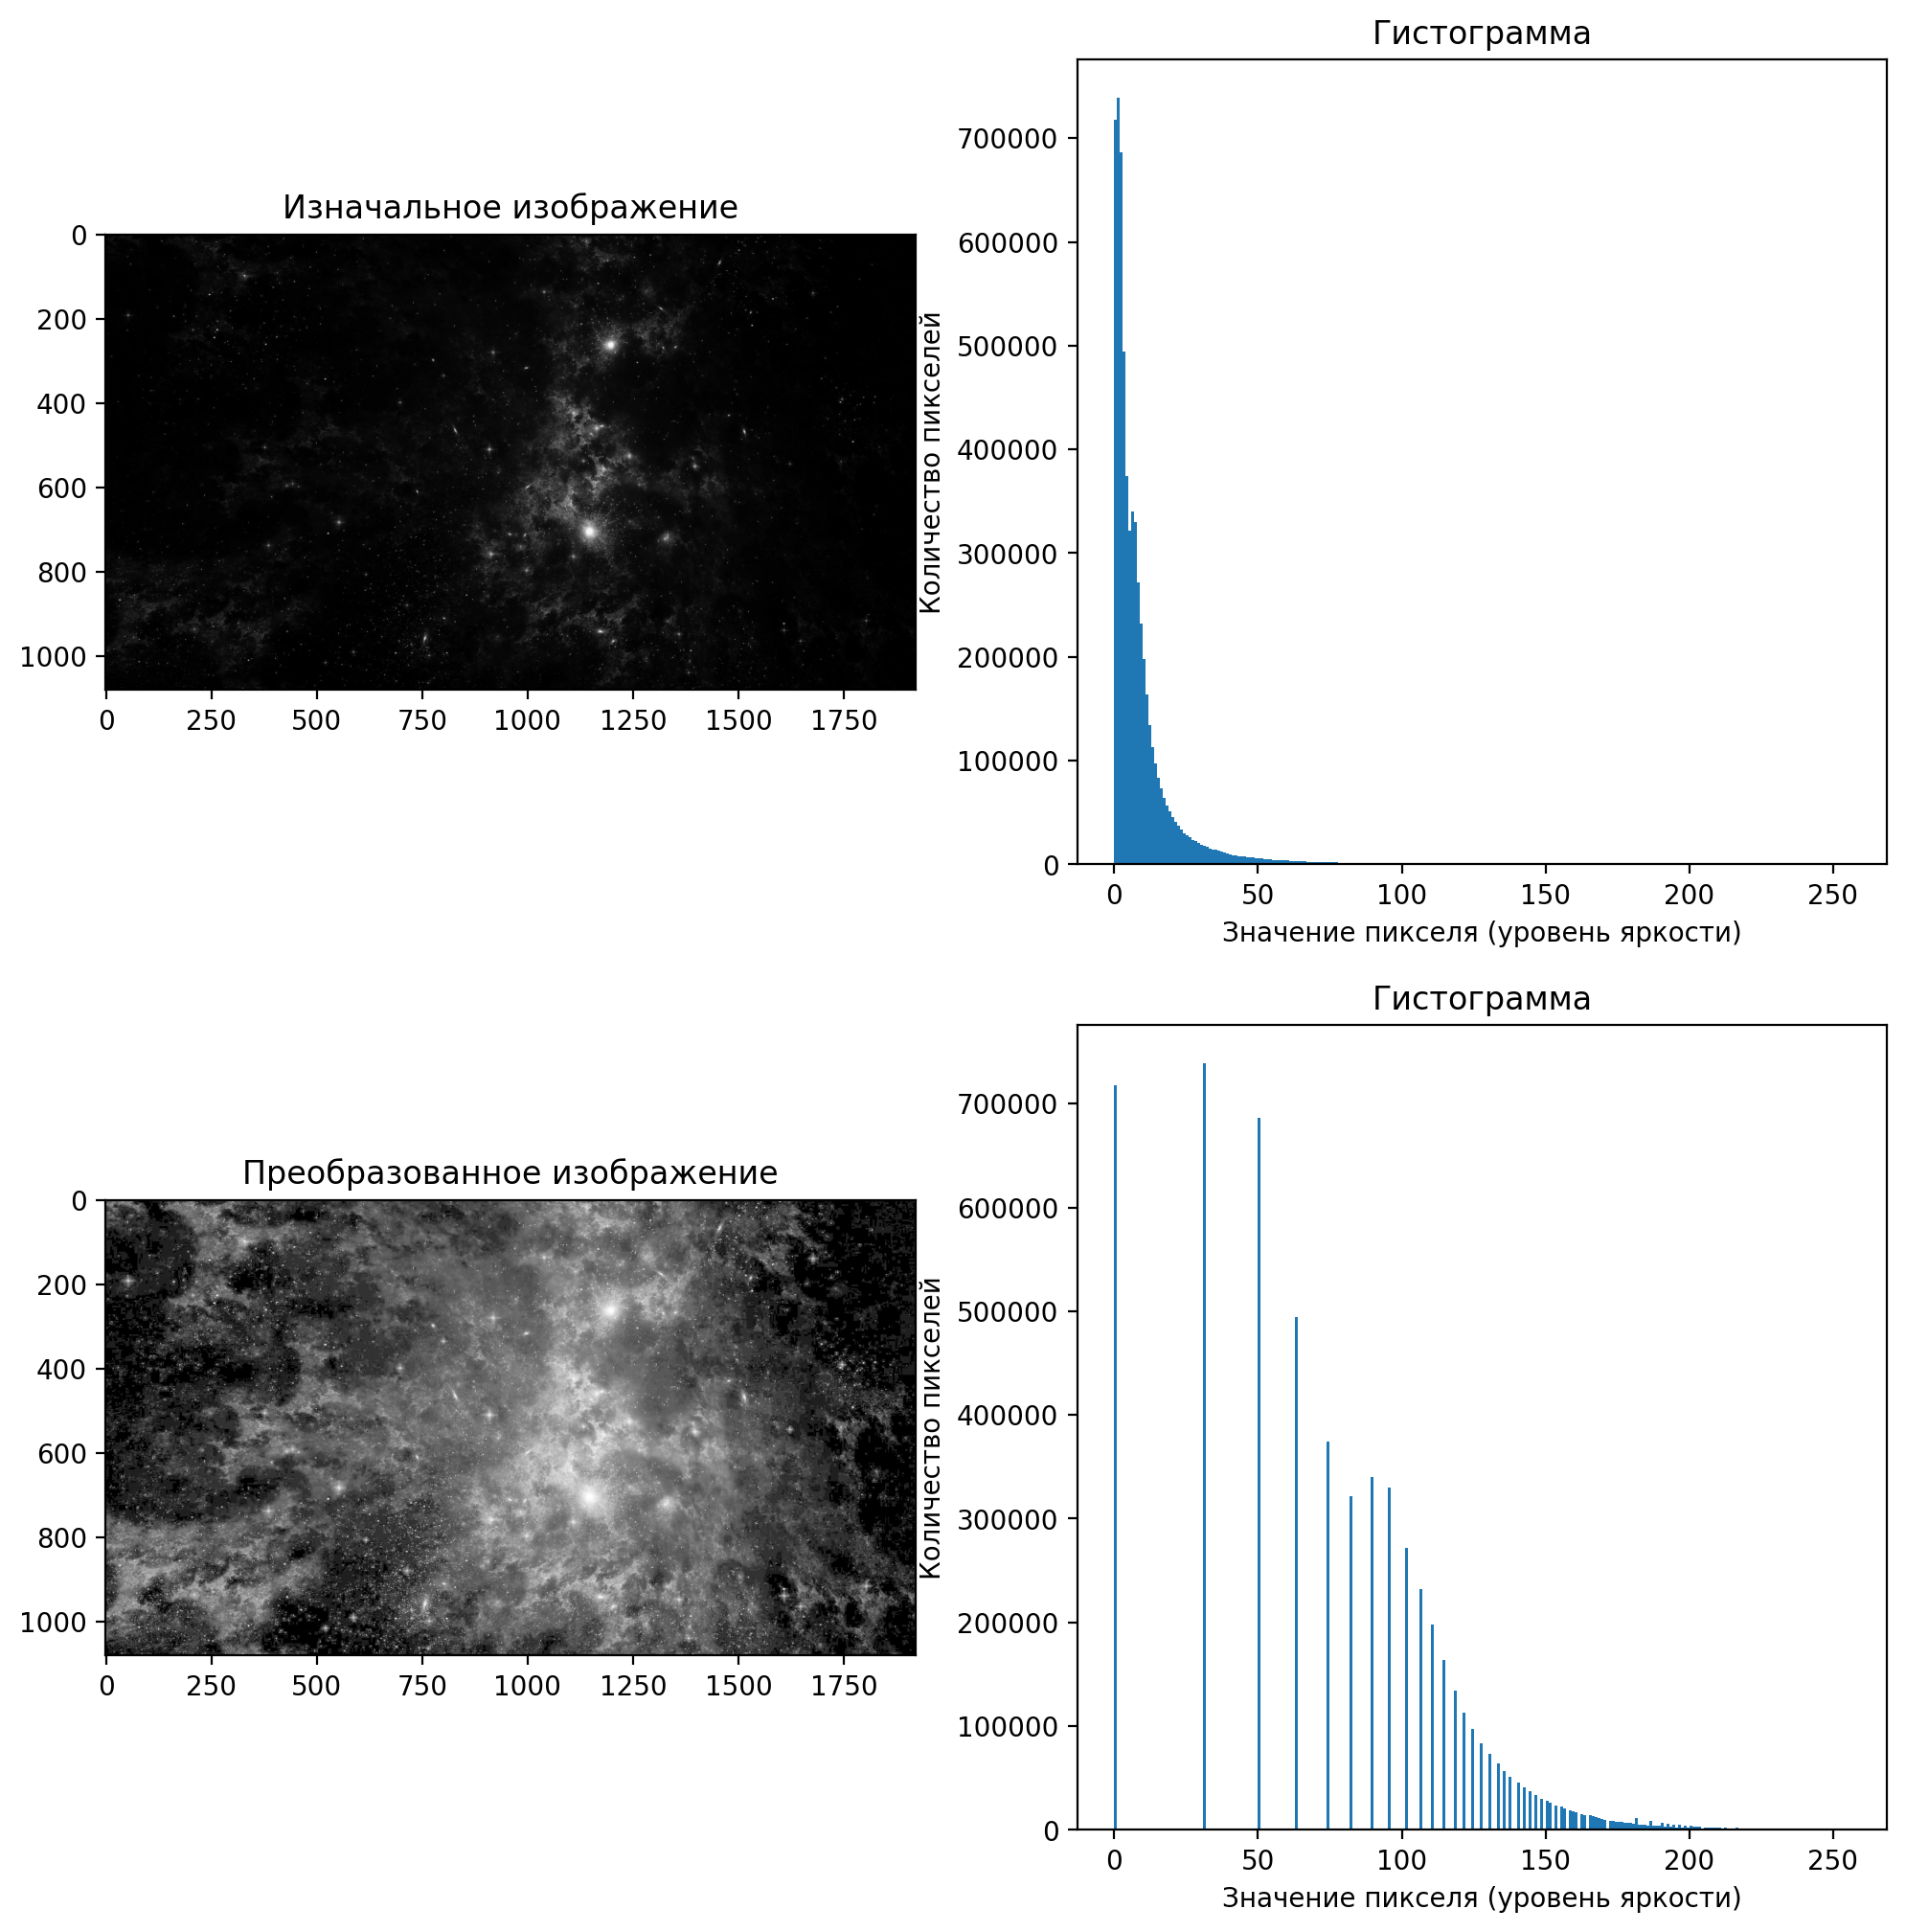

In [31]:
def logarithmic(img):
    c = 255 / (np.log(1 + np.max(img)))
    s = c * np.log(1 + img)
    return np.array(s, dtype=np.uint8)

b2r('img2.jpeg', logarithmic)

Функция вычисляет максимальное значение пикселя в изображении, затем вычисляет коэффициент c по формуле c = 255 / (np.log(1 + np.max(img))). Затем она вычисляет новый массив s по формуле s = c * np.log(1 + img). Наконец, функция возвращает массив s, приведенный к целочисленному типу np.uint8.

Результаты, которые будут отображены при вызове функции -- это графики, на которых будут представлены изначальное черно-белое изображение, преобразованное черно-белое изображение с применением логарифмического преобразования, а также гистограммы для обоих изображений.

На графике изначального изображения показывается, как выглядит изображение до применения преобразования. График гистограммы для изначального изображения показывает, как распределены уровни яркости в изображении.

После этого изображение подвергается логарифмическому преобразованию, которое увеличивает контрастность изображения. На графике преобразованного изображения показывается, как выглядит изображение после применения преобразования. На графике гистограммы для преобразованного изображения показывается, как распределены уровни яркости в преобразованном изображении.

Таким образом, результаты отображают информацию о том, как изменяется изображение после применения логарифмического преобразования, а также позволяют оценить, как распределены уровни яркости в изображении до и после преобразования.

### Степенные преобразования (гамма-коррекция)

Степенные преобразования имеют вид $s = cr^\gamma$.
При $\gamma > 1$ пиксели становятся темнее при $\gamma < 1$ дают обратный эффект  

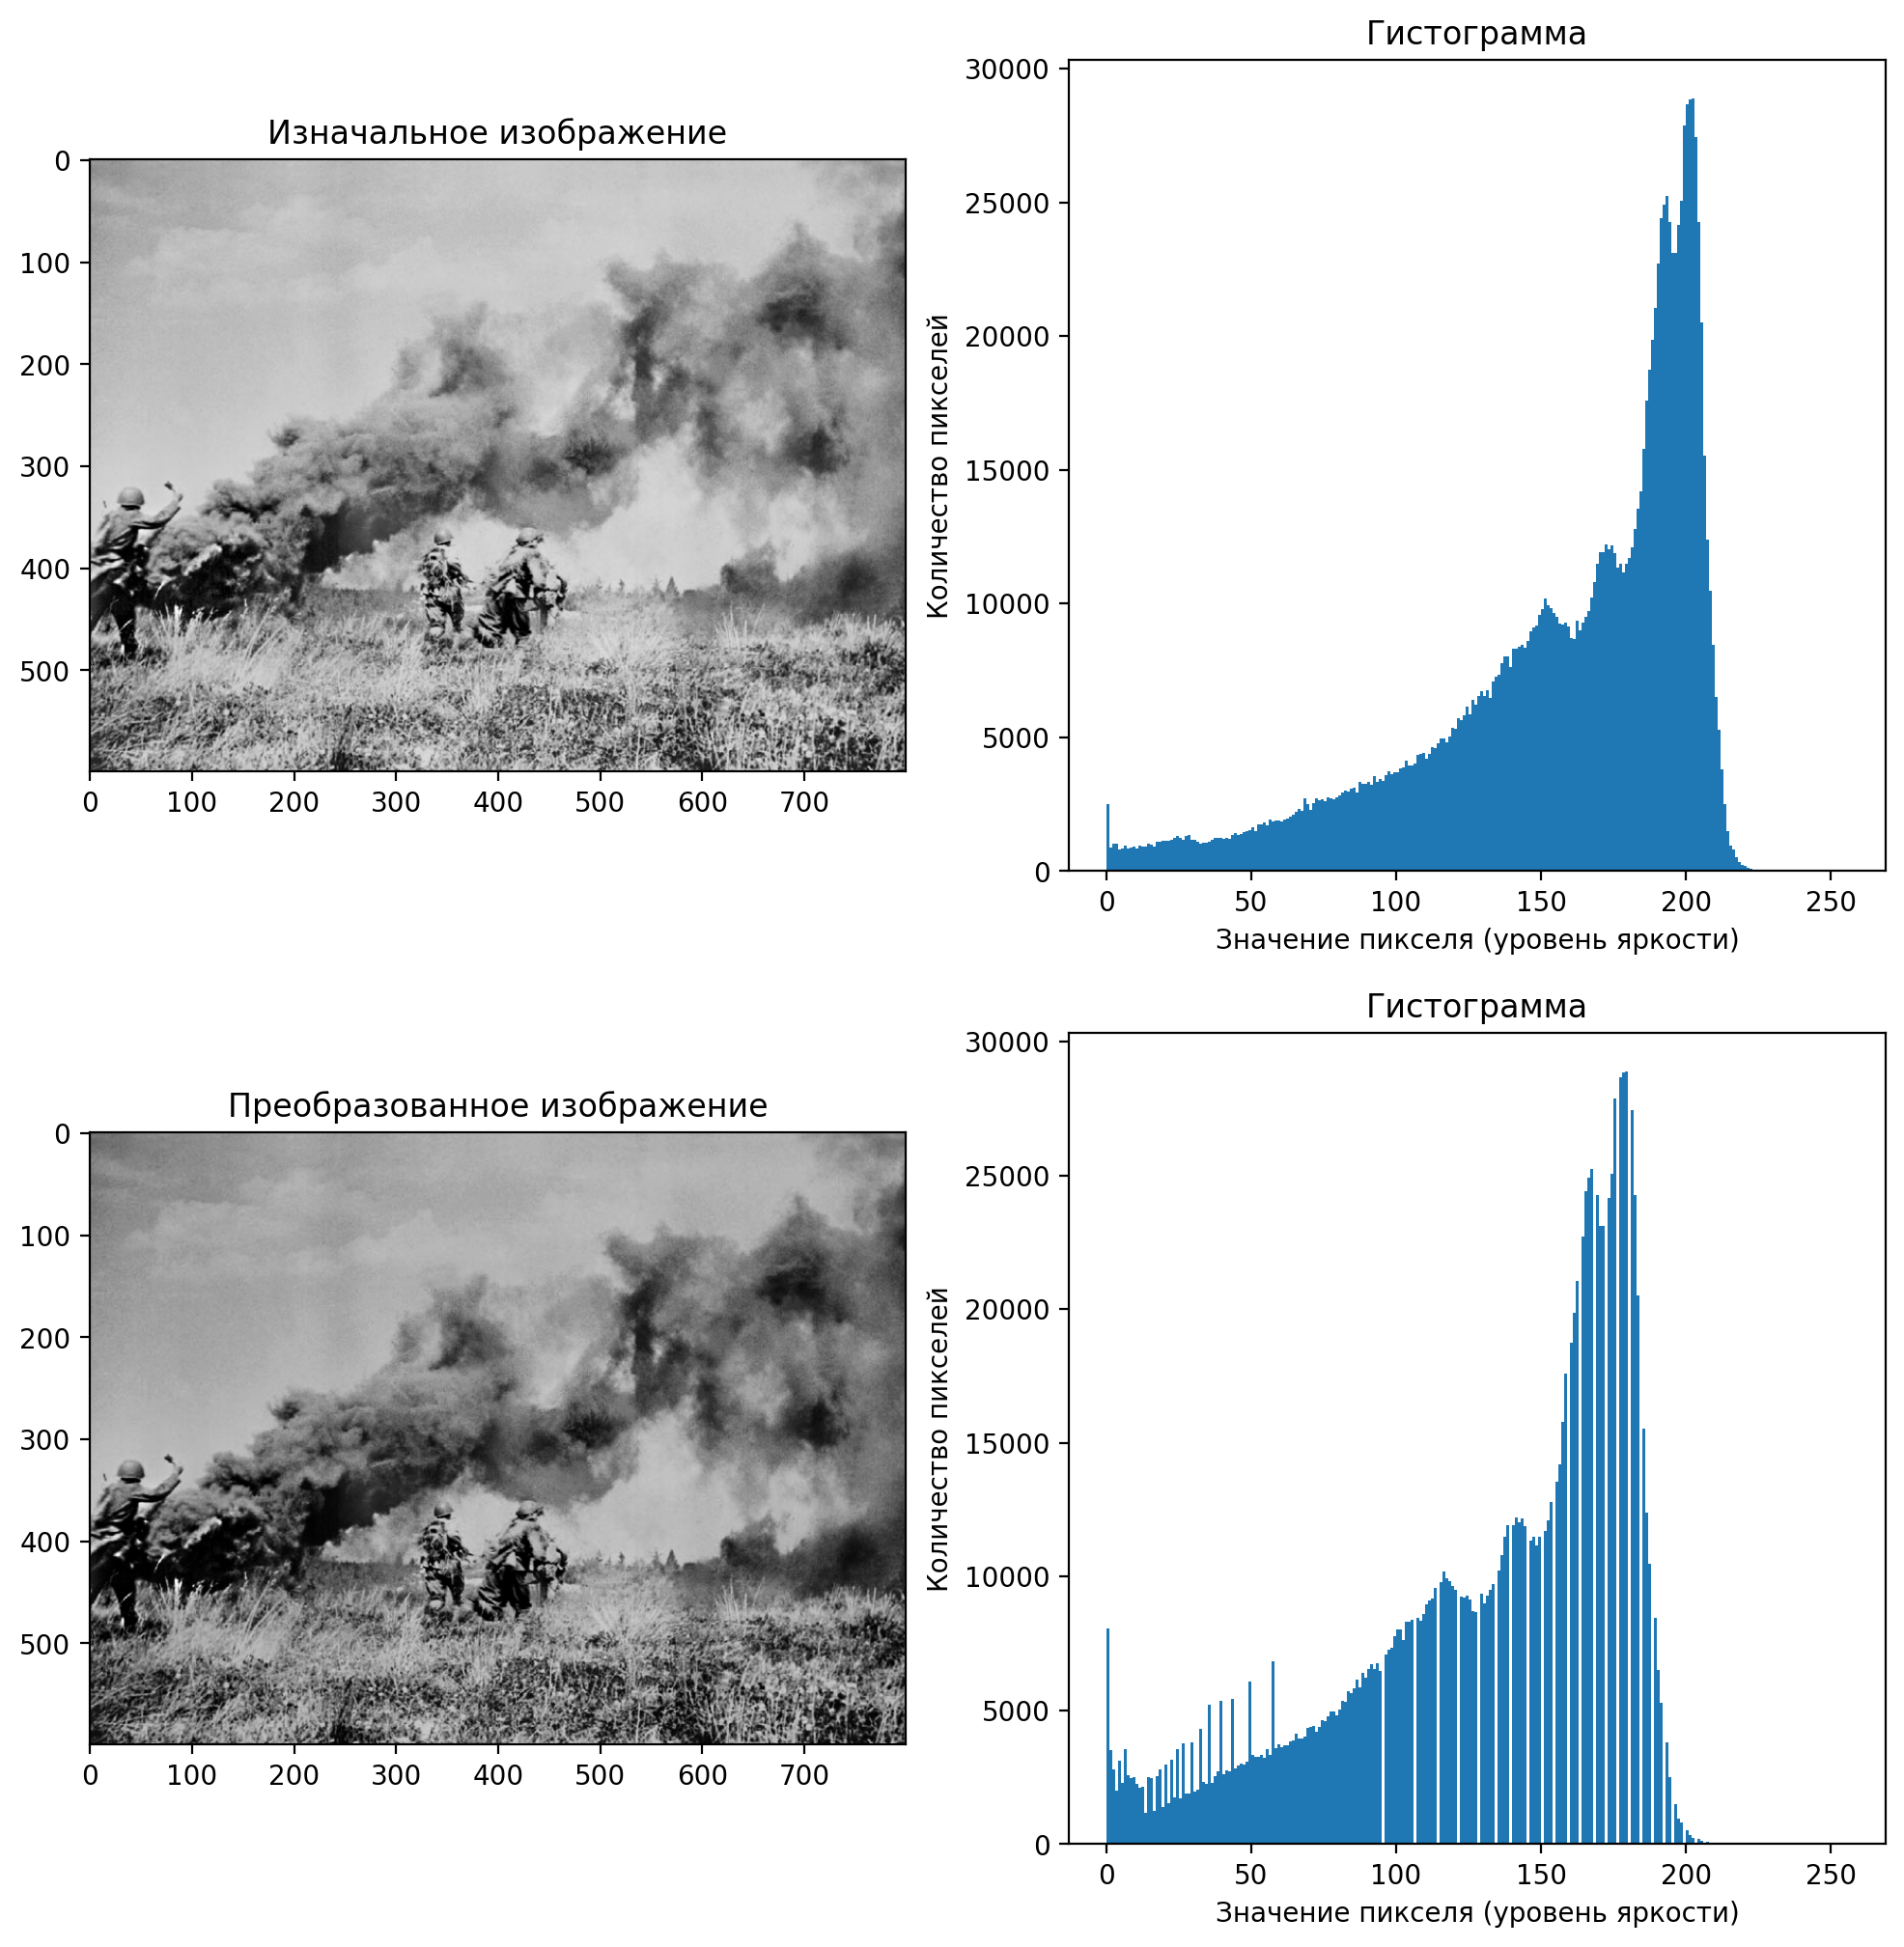

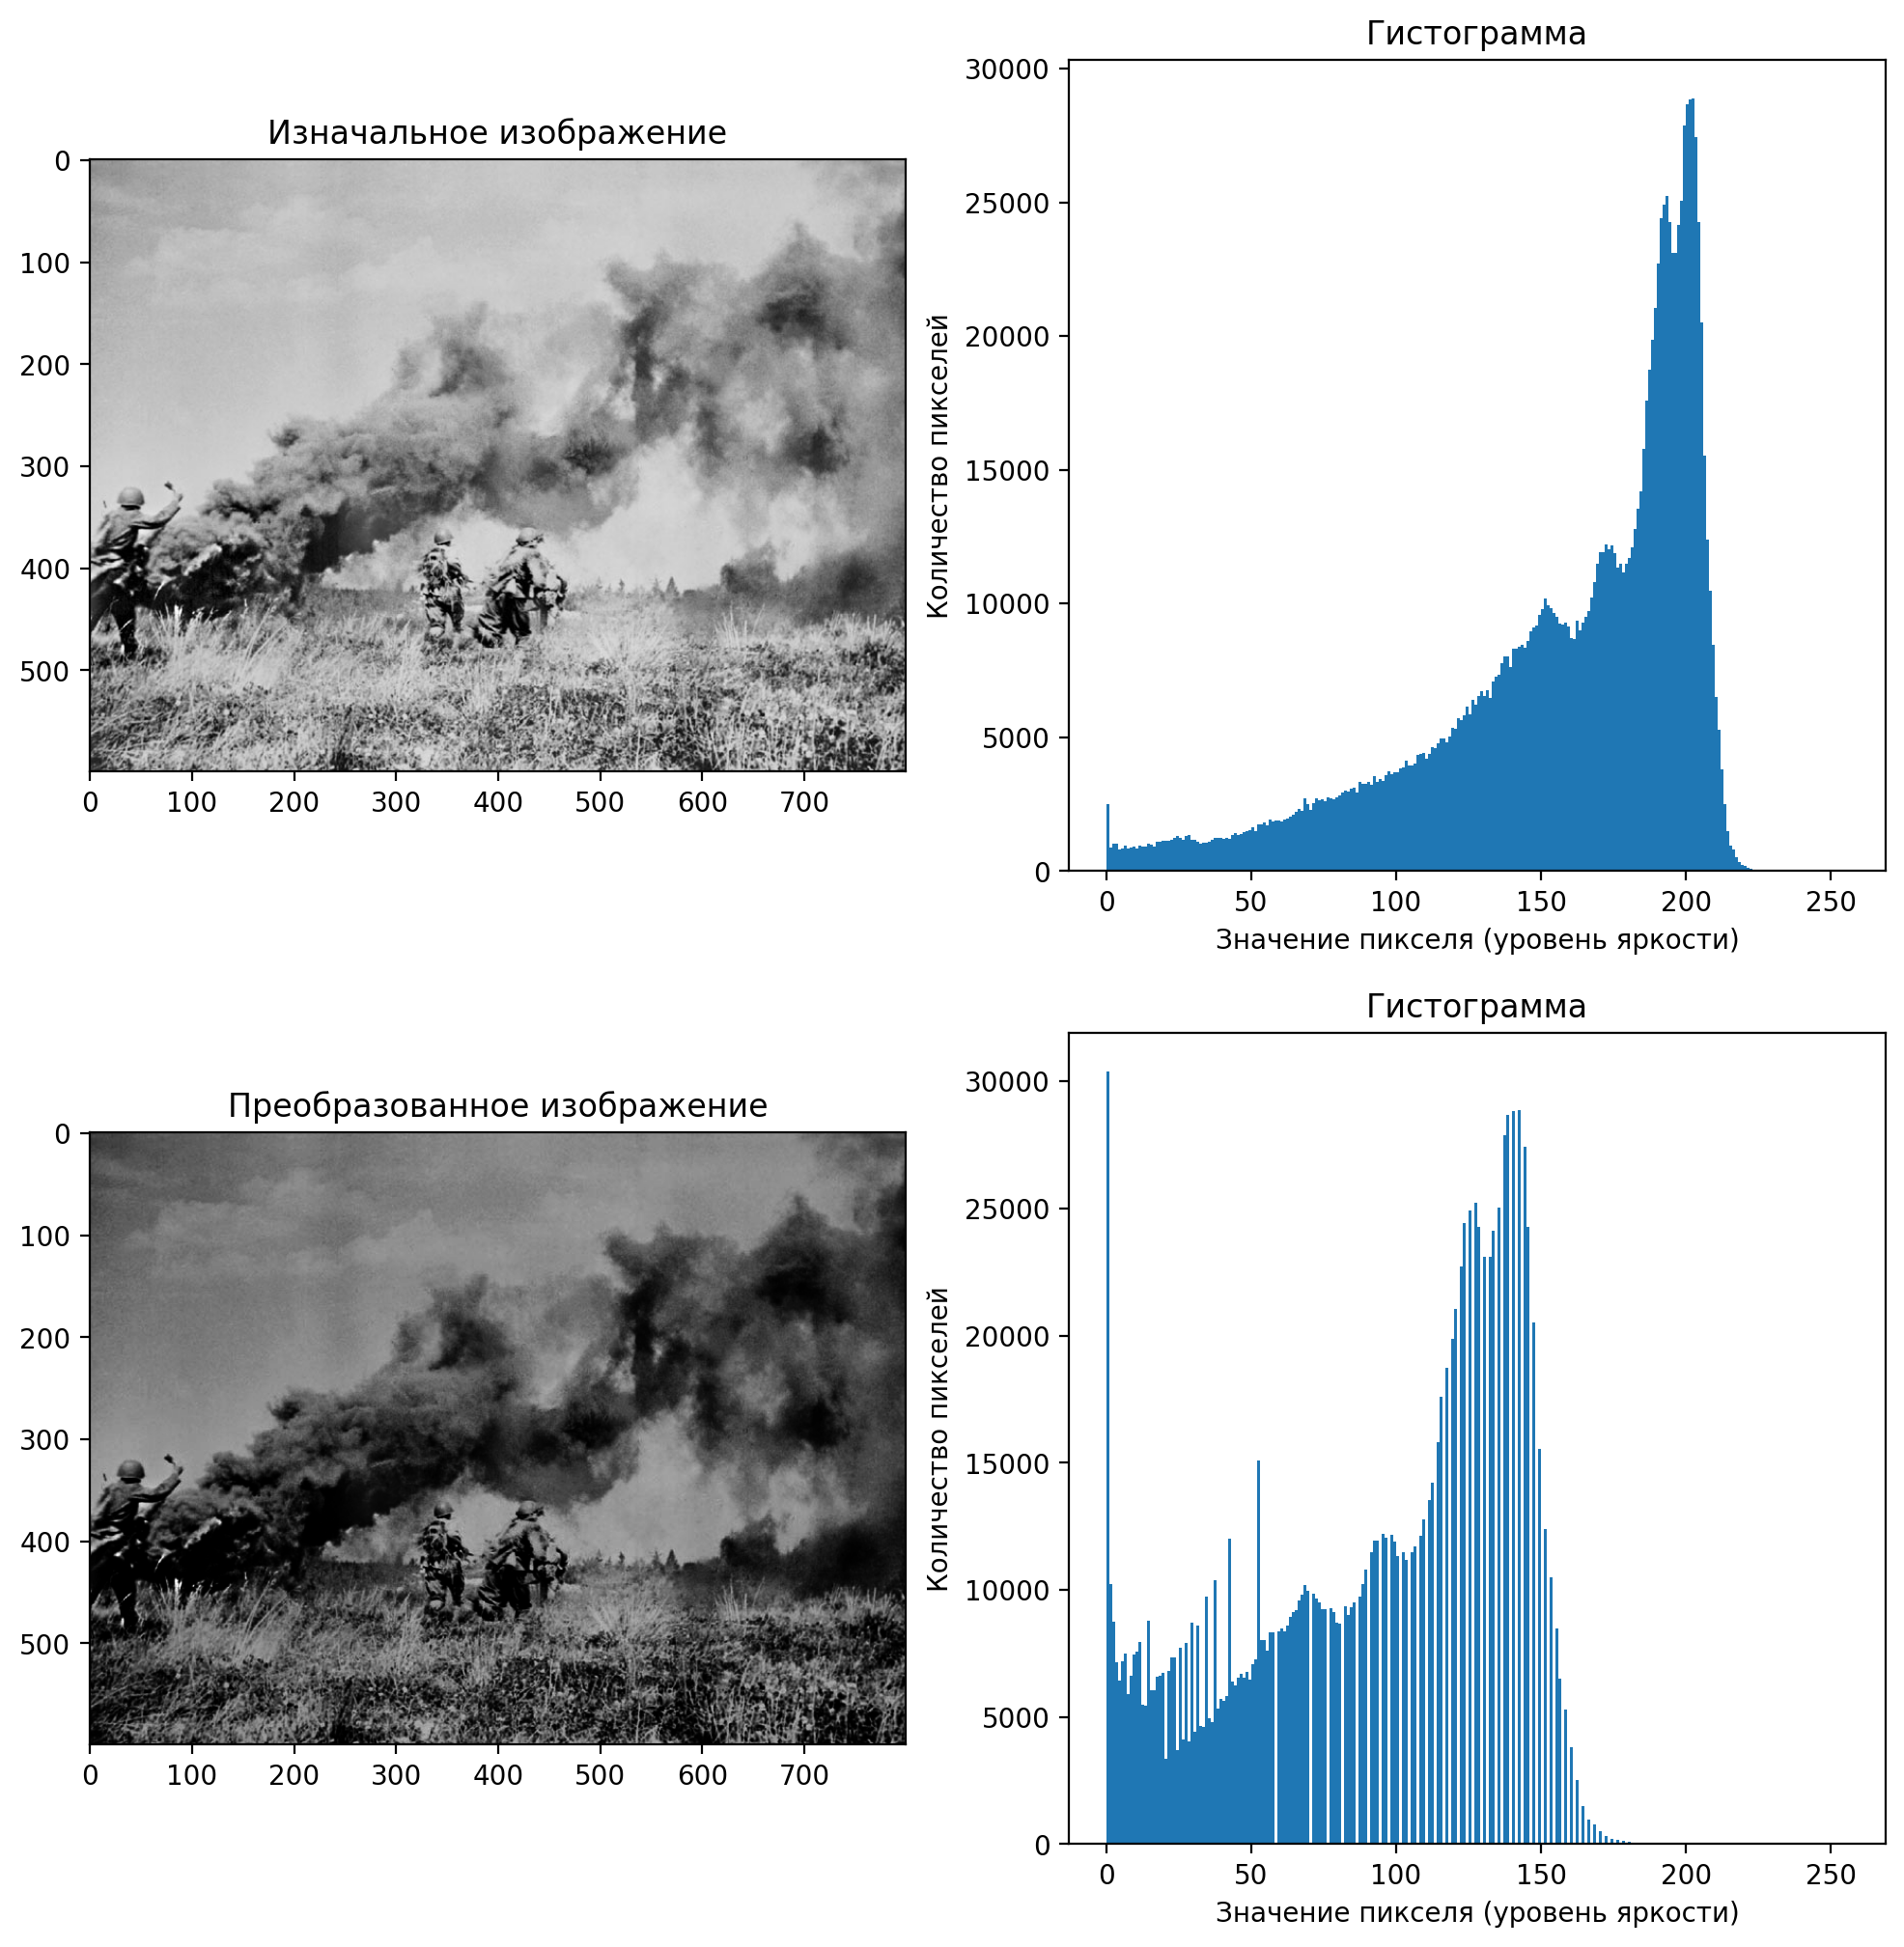

In [34]:
def gamma_corection(img, gamma):
    return np.array(255*(img / 255) ** gamma, dtype = 'uint8')

b2r('img3.jpg', gamma_corection, gamma=1.5)
b2r('img3.jpg', gamma_corection, gamma=2.5)
# **kwargs в функции b2r позволяет добавить аргумент gamma

Функция вычисляет новый массив s по формуле s = 255 * (img / 255) ** gamma. Затем функция возвращает массив s, приведенный к целочисленному типу np.uint8.

Результаты вызовов будут отображены на графиках, которые строятся в функции b2r. Эти графики покажут изначальное изображение, преобразованное изображение с применением коррекции гамма, а также гистограммы для обоих изображений.

Параметр gamma задает степень коррекции гамма. Значение gamma=1 соответствует линейному преобразованию, а значения gamma>1 увеличивают контрастность изображения (темные области становятся темнее, а светлые области становятся светлее). Значения gamma<1 уменьшают контрастность изображения (темные области становятся светлее, а светлые области становятся темнее).

Таким образом, результаты отображают информацию о том, как изменяется изображение после применения коррекции гамма с различными значениями gamma, а также позволяют оценить, как распределены уровни яркости в изображении до и после преобразования.

На преобразованных изображениях заметно изменение гаммы цвета

### Кусочно-линейные функции преобразований

Контраст может быть определён как Contrast =  (I_max - I_min)/(I_max + I_min). 

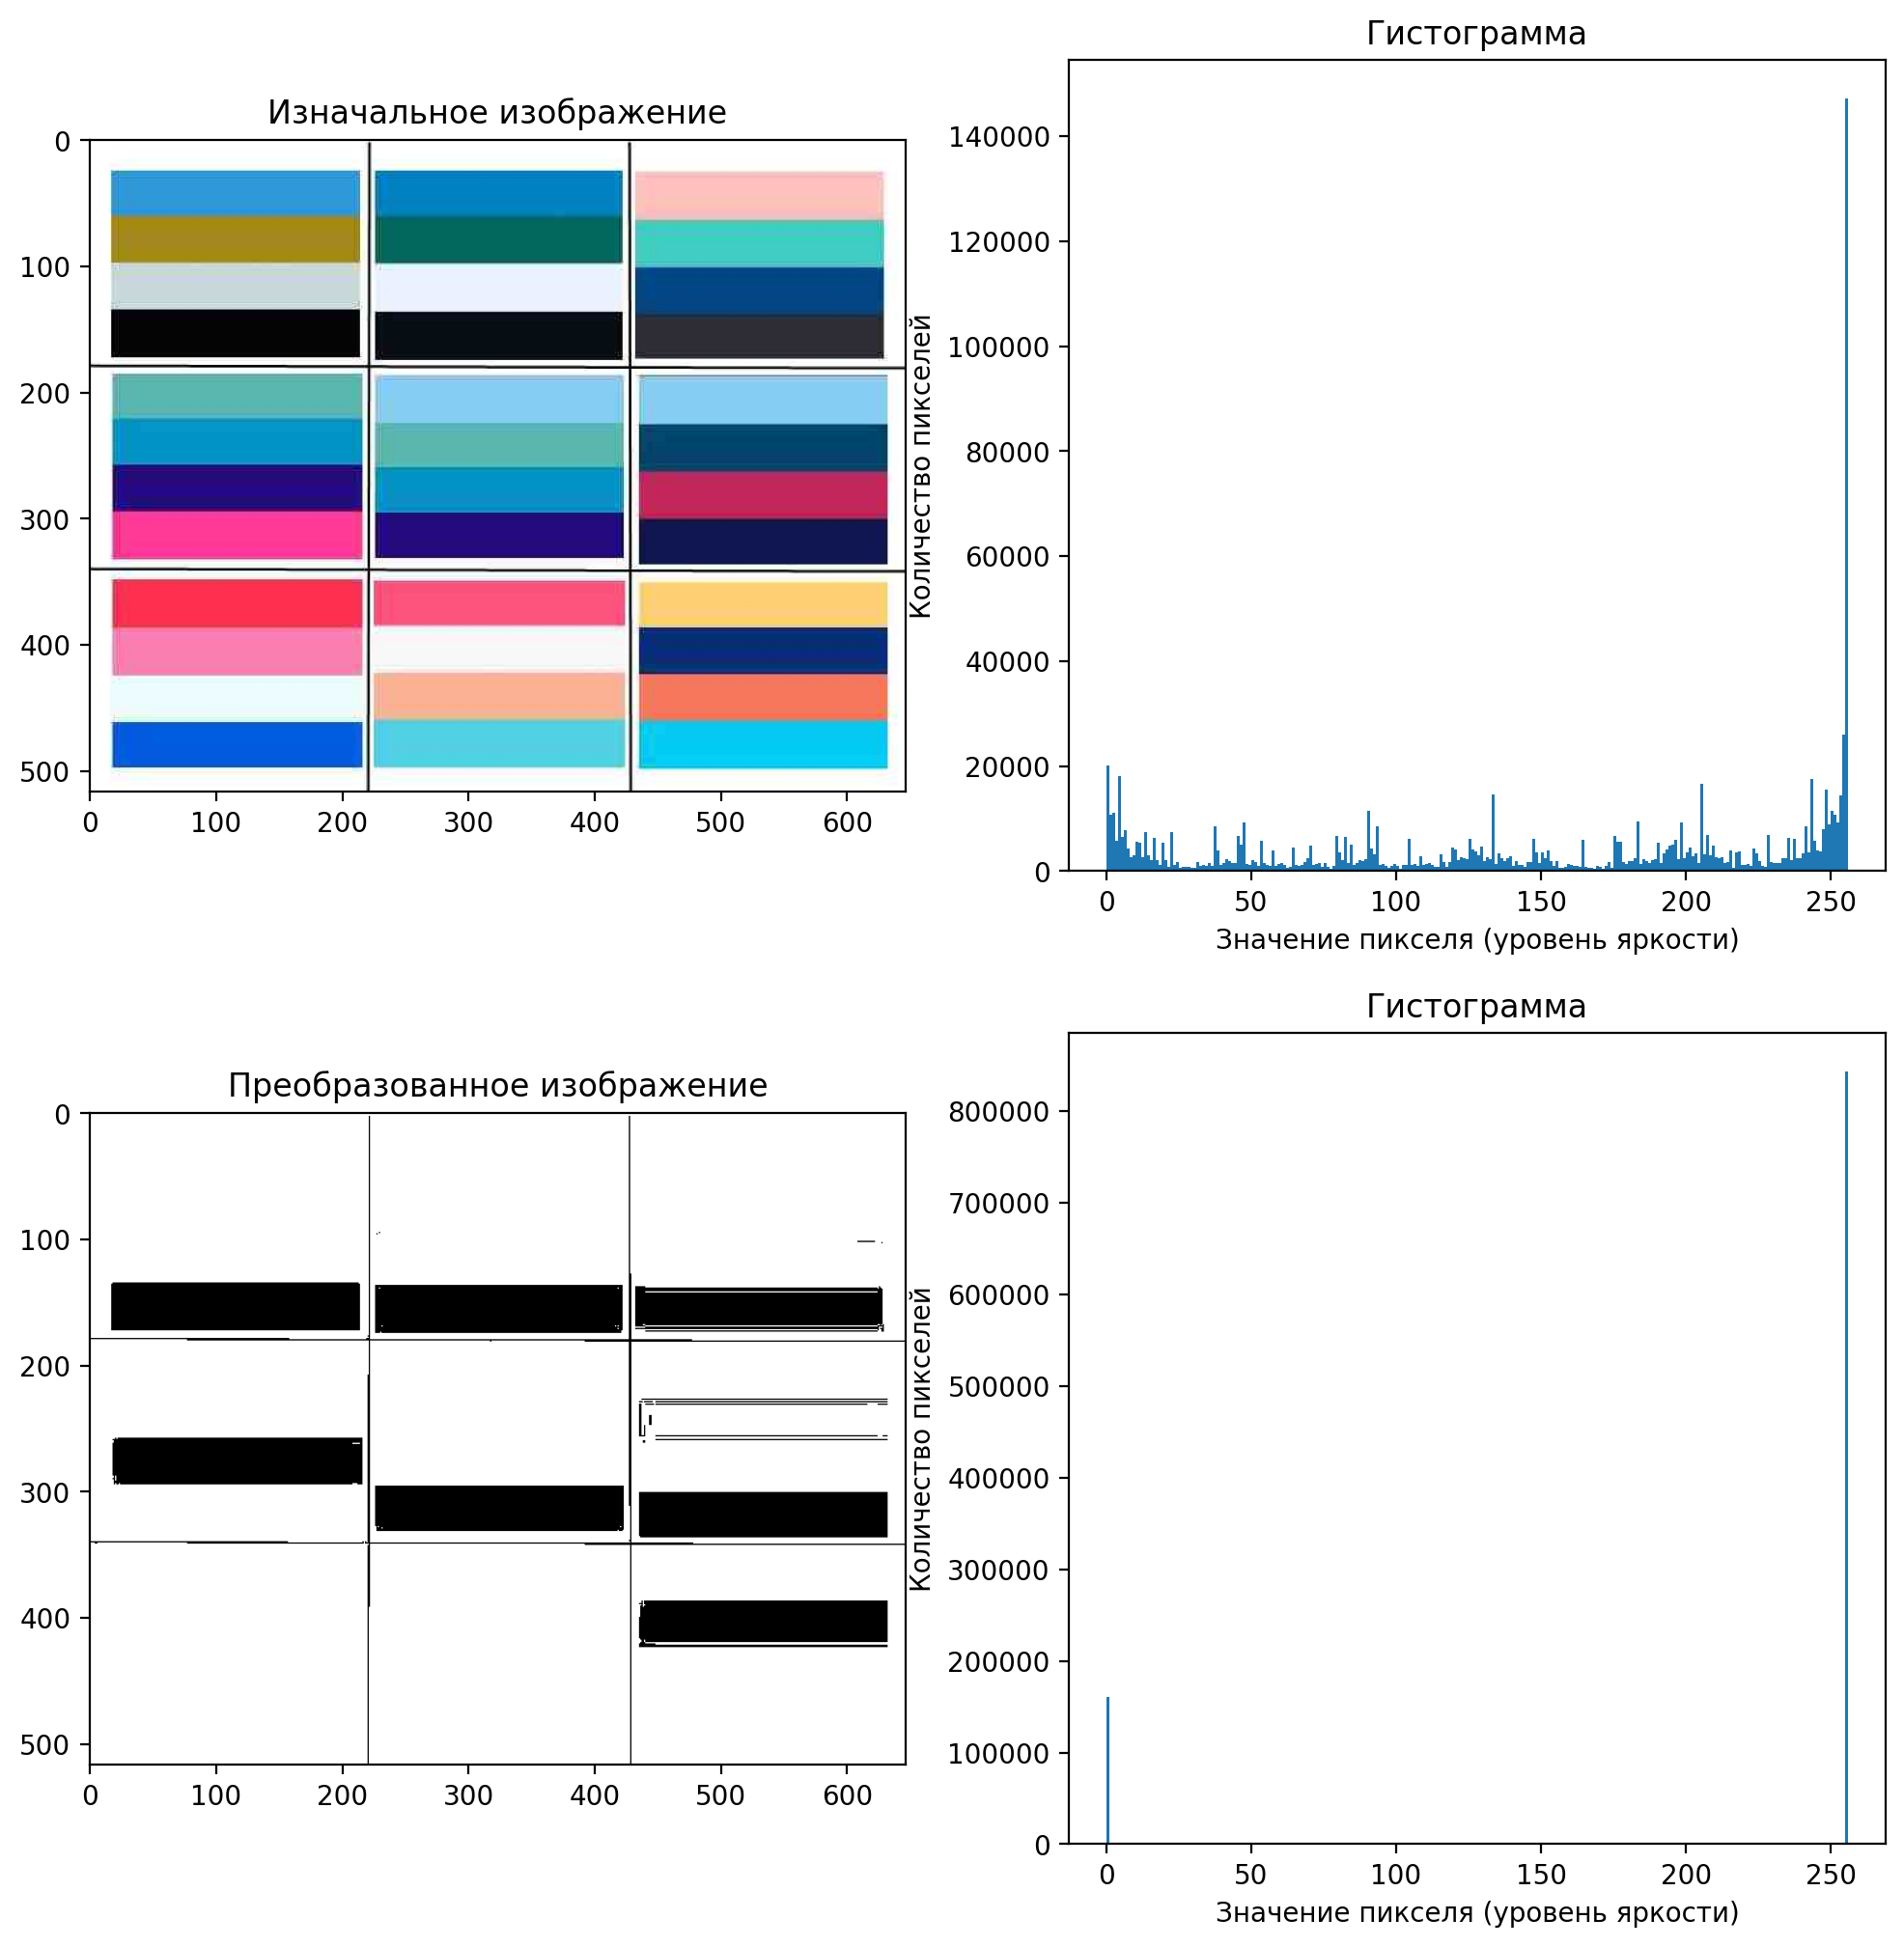

In [38]:
def thresholding(img, th=None):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if th is None:
        th = gray_img.mean()
    ret, thresh = cv2.threshold(gray_img, th, 255, cv2.THRESH_BINARY)
    thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
    return thresh

b2r('img6.jpeg', thresholding, th=50)

Функция сначала преобразует цветное изображение в оттенки серого с помощью функции cv2.cvtColor, используя флаг cv2.COLOR_RGB2GRAY. Затем, если параметр th не задан, функция вычисляет среднее значение яркости всех пикселей в сером изображении и использует его в качестве порогового значения. Если параметр th задан, то она использует его как пороговое значение.

Затем функция использует функцию cv2.threshold для выполнения бинаризации изображения. В качестве порогового значения используется значение th, а в качестве максимального значения используется значение 255. Режим бинаризации задается флагом cv2.THRESH_BINARY. Полученное черно-белое изображение преобразуется обратно в цветное изображение с помощью функции cv2.cvtColor, используя флаг cv2.COLOR_GRAY2RGB.

Результаты вызова функции b2r('img4.jpeg', thresholding, th=50) будут отображены на графиках, которые строятся в функции b2r. Эти графики покажут изначальное цветное изображение, преобразованное черно-белое изображение после пороговой бинаризации, а также гистограммы для обоих изображений.

Таким образом, функция thresholding позволяет выполнить пороговую бинаризацию для цветного изображения и получить черно-белое изображение, на котором объекты с высокой яркостью выделены белым цветом, а объекты с низкой яркостью -- черным цветом.

/var/folders/_j/8gmpkdtx6zn2d6w209q13bw00000gn/T/ipykernel_8875/935567550.py:2: RuntimeWarning: invalid value encountered in divide
  return (((img - np.min(img)) / (np.max(img) - np.min(img)))*255).astype(int)


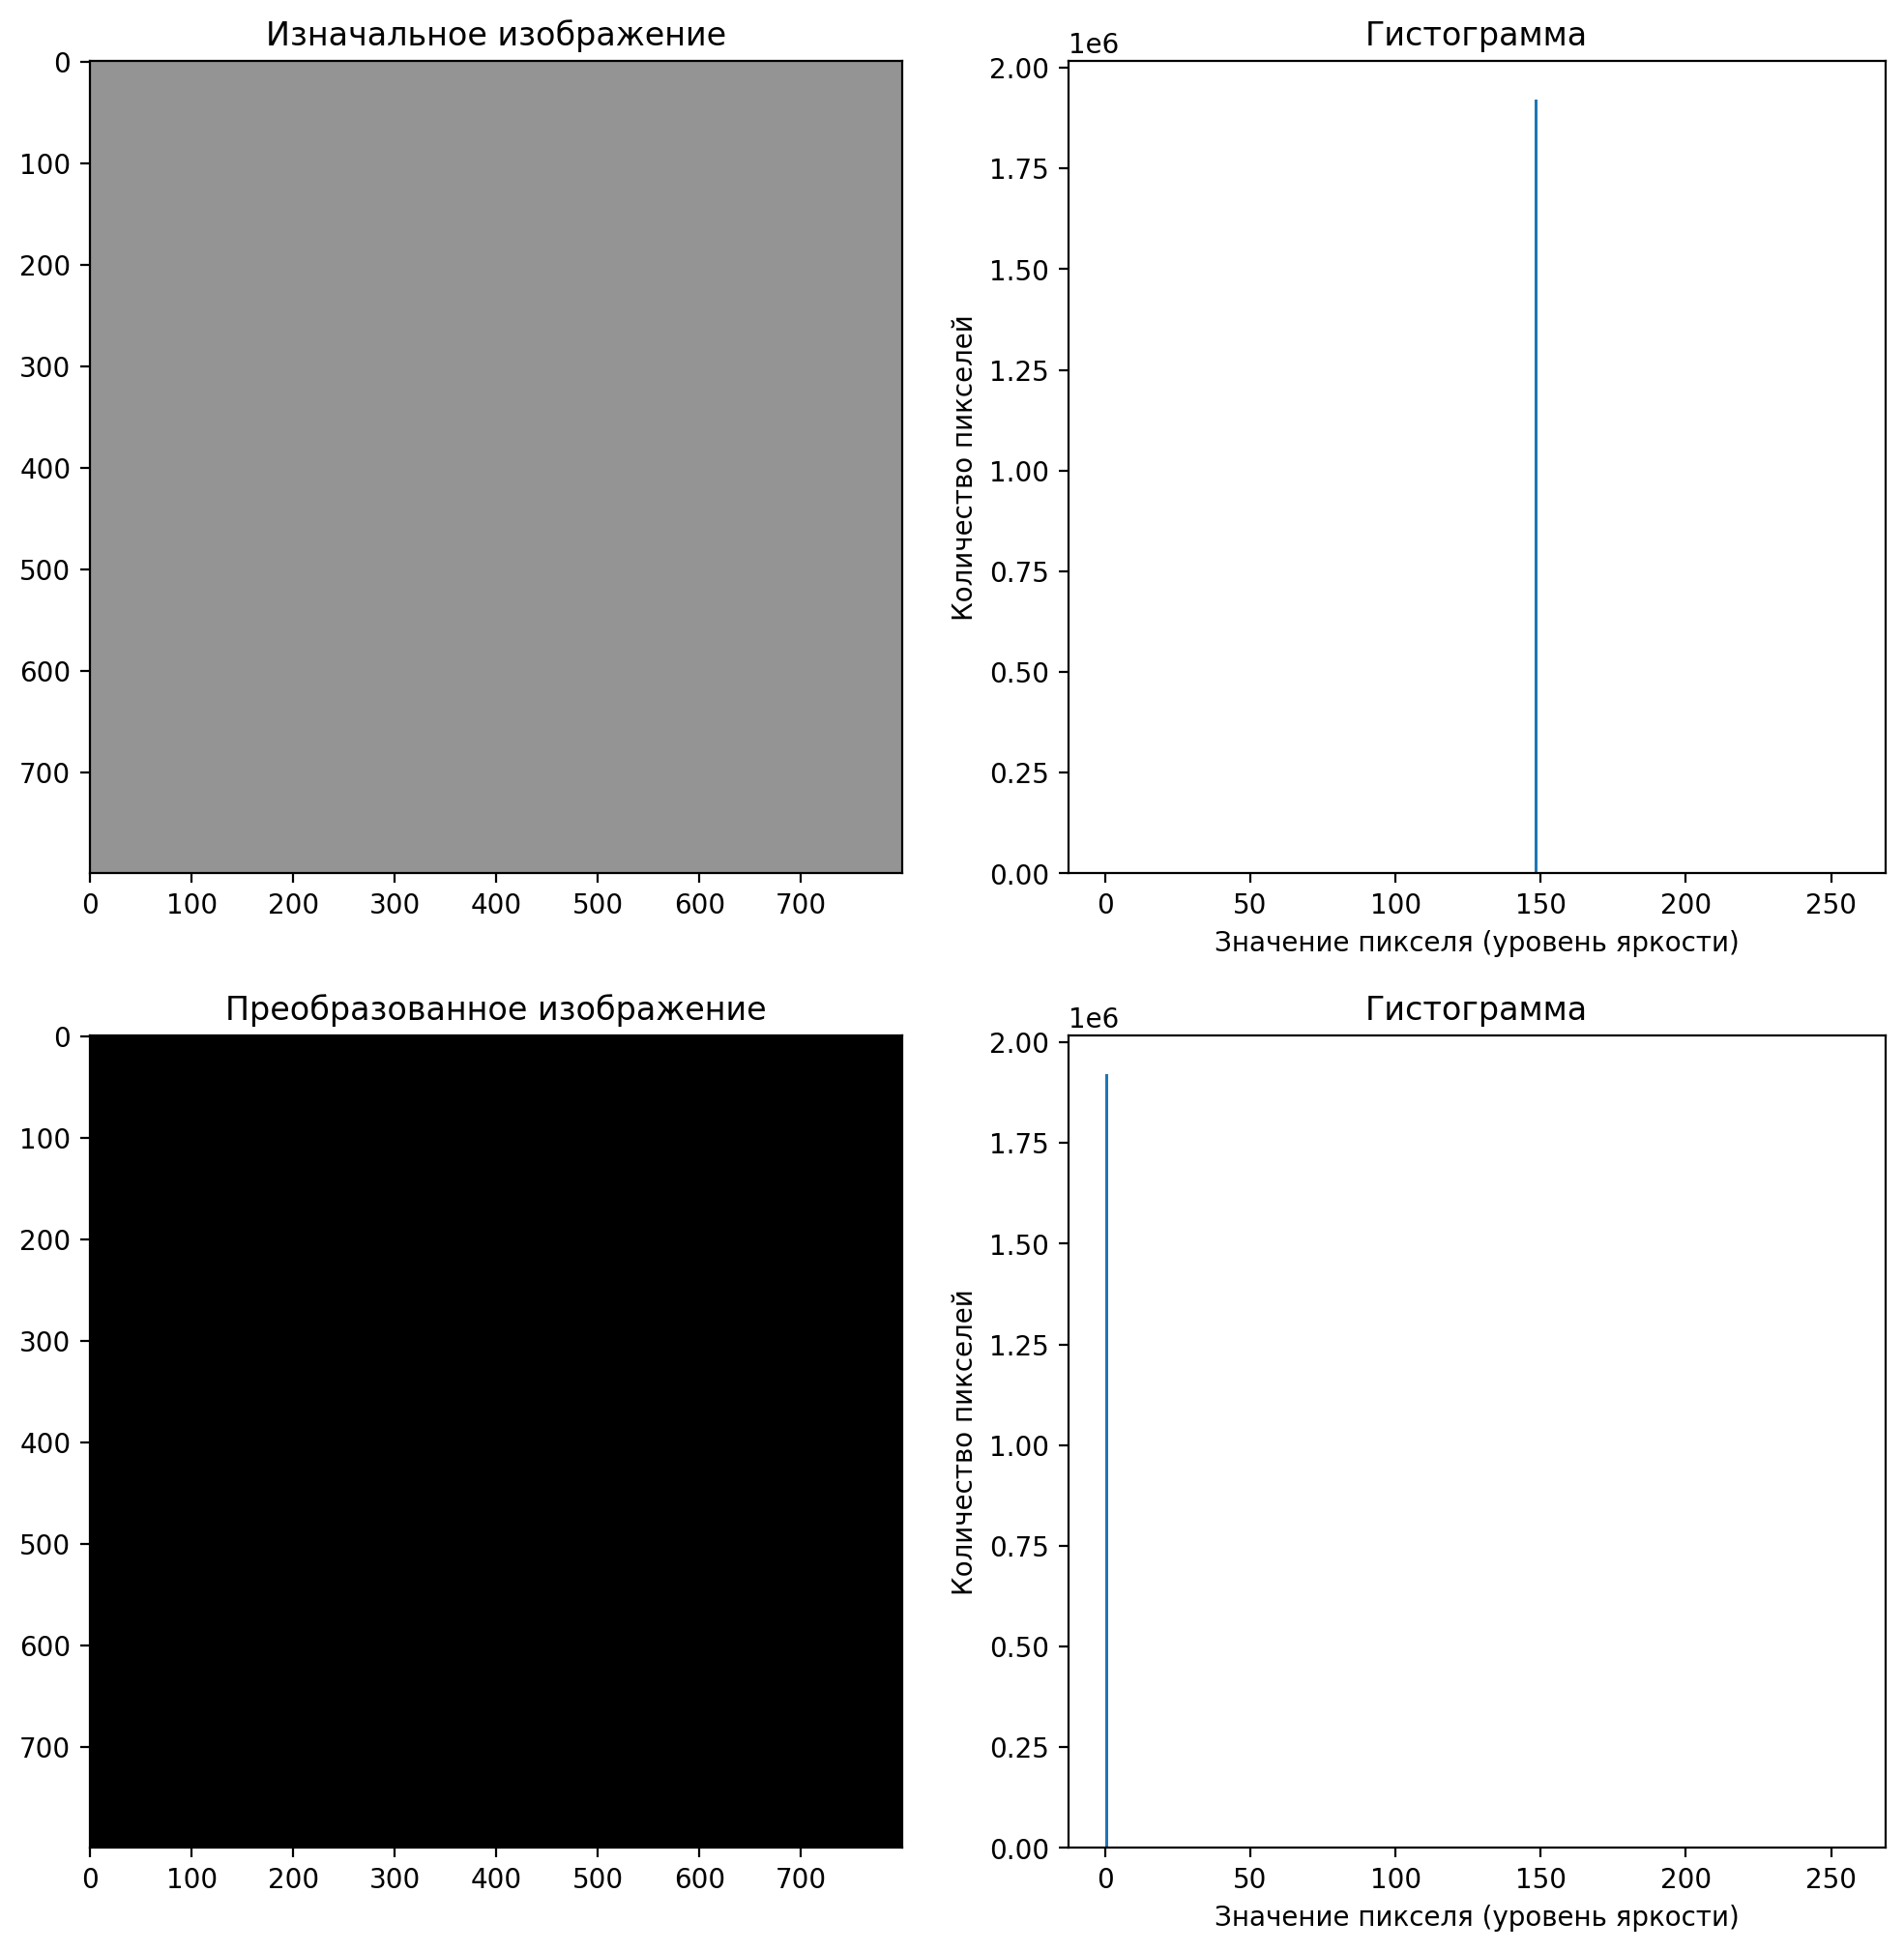

In [40]:
def minmaxnorm(img):
    return (((img - np.min(img)) / (np.max(img) - np.min(img)))*255).astype(int)
    
b2r('img5.jpeg', minmaxnorm)

Функция вычисляет минимальное и максимальное значения пикселей в изображении с помощью функций np.min и np.max. Затем она нормализует значения пикселей в диапазоне от 0 до 255, используя формулу (((img - np.min(img)) / (np.max(img) - np.min(img))) * 255). Затем функция возвращает нормализованный массив, приведенный к целочисленному типу np.uint8.

Результаты вызова функции b2r('blue.jpg', minmaxnorm) будут отображены на графиках, которые строятся в функции b2r. Эти графики покажут изначальное черно-белое изображение, преобразованное изображение после нормализации, а также гистограммы для обоих изображений.

Таким образом, функция minmaxnorm позволяет выполнить нормализацию минимум-максимум для черно-белого изображения, чтобы значения яркости находились в диапазоне от 0 до 255, что может быть полезно для более точного анализа изображений.

### Линейные

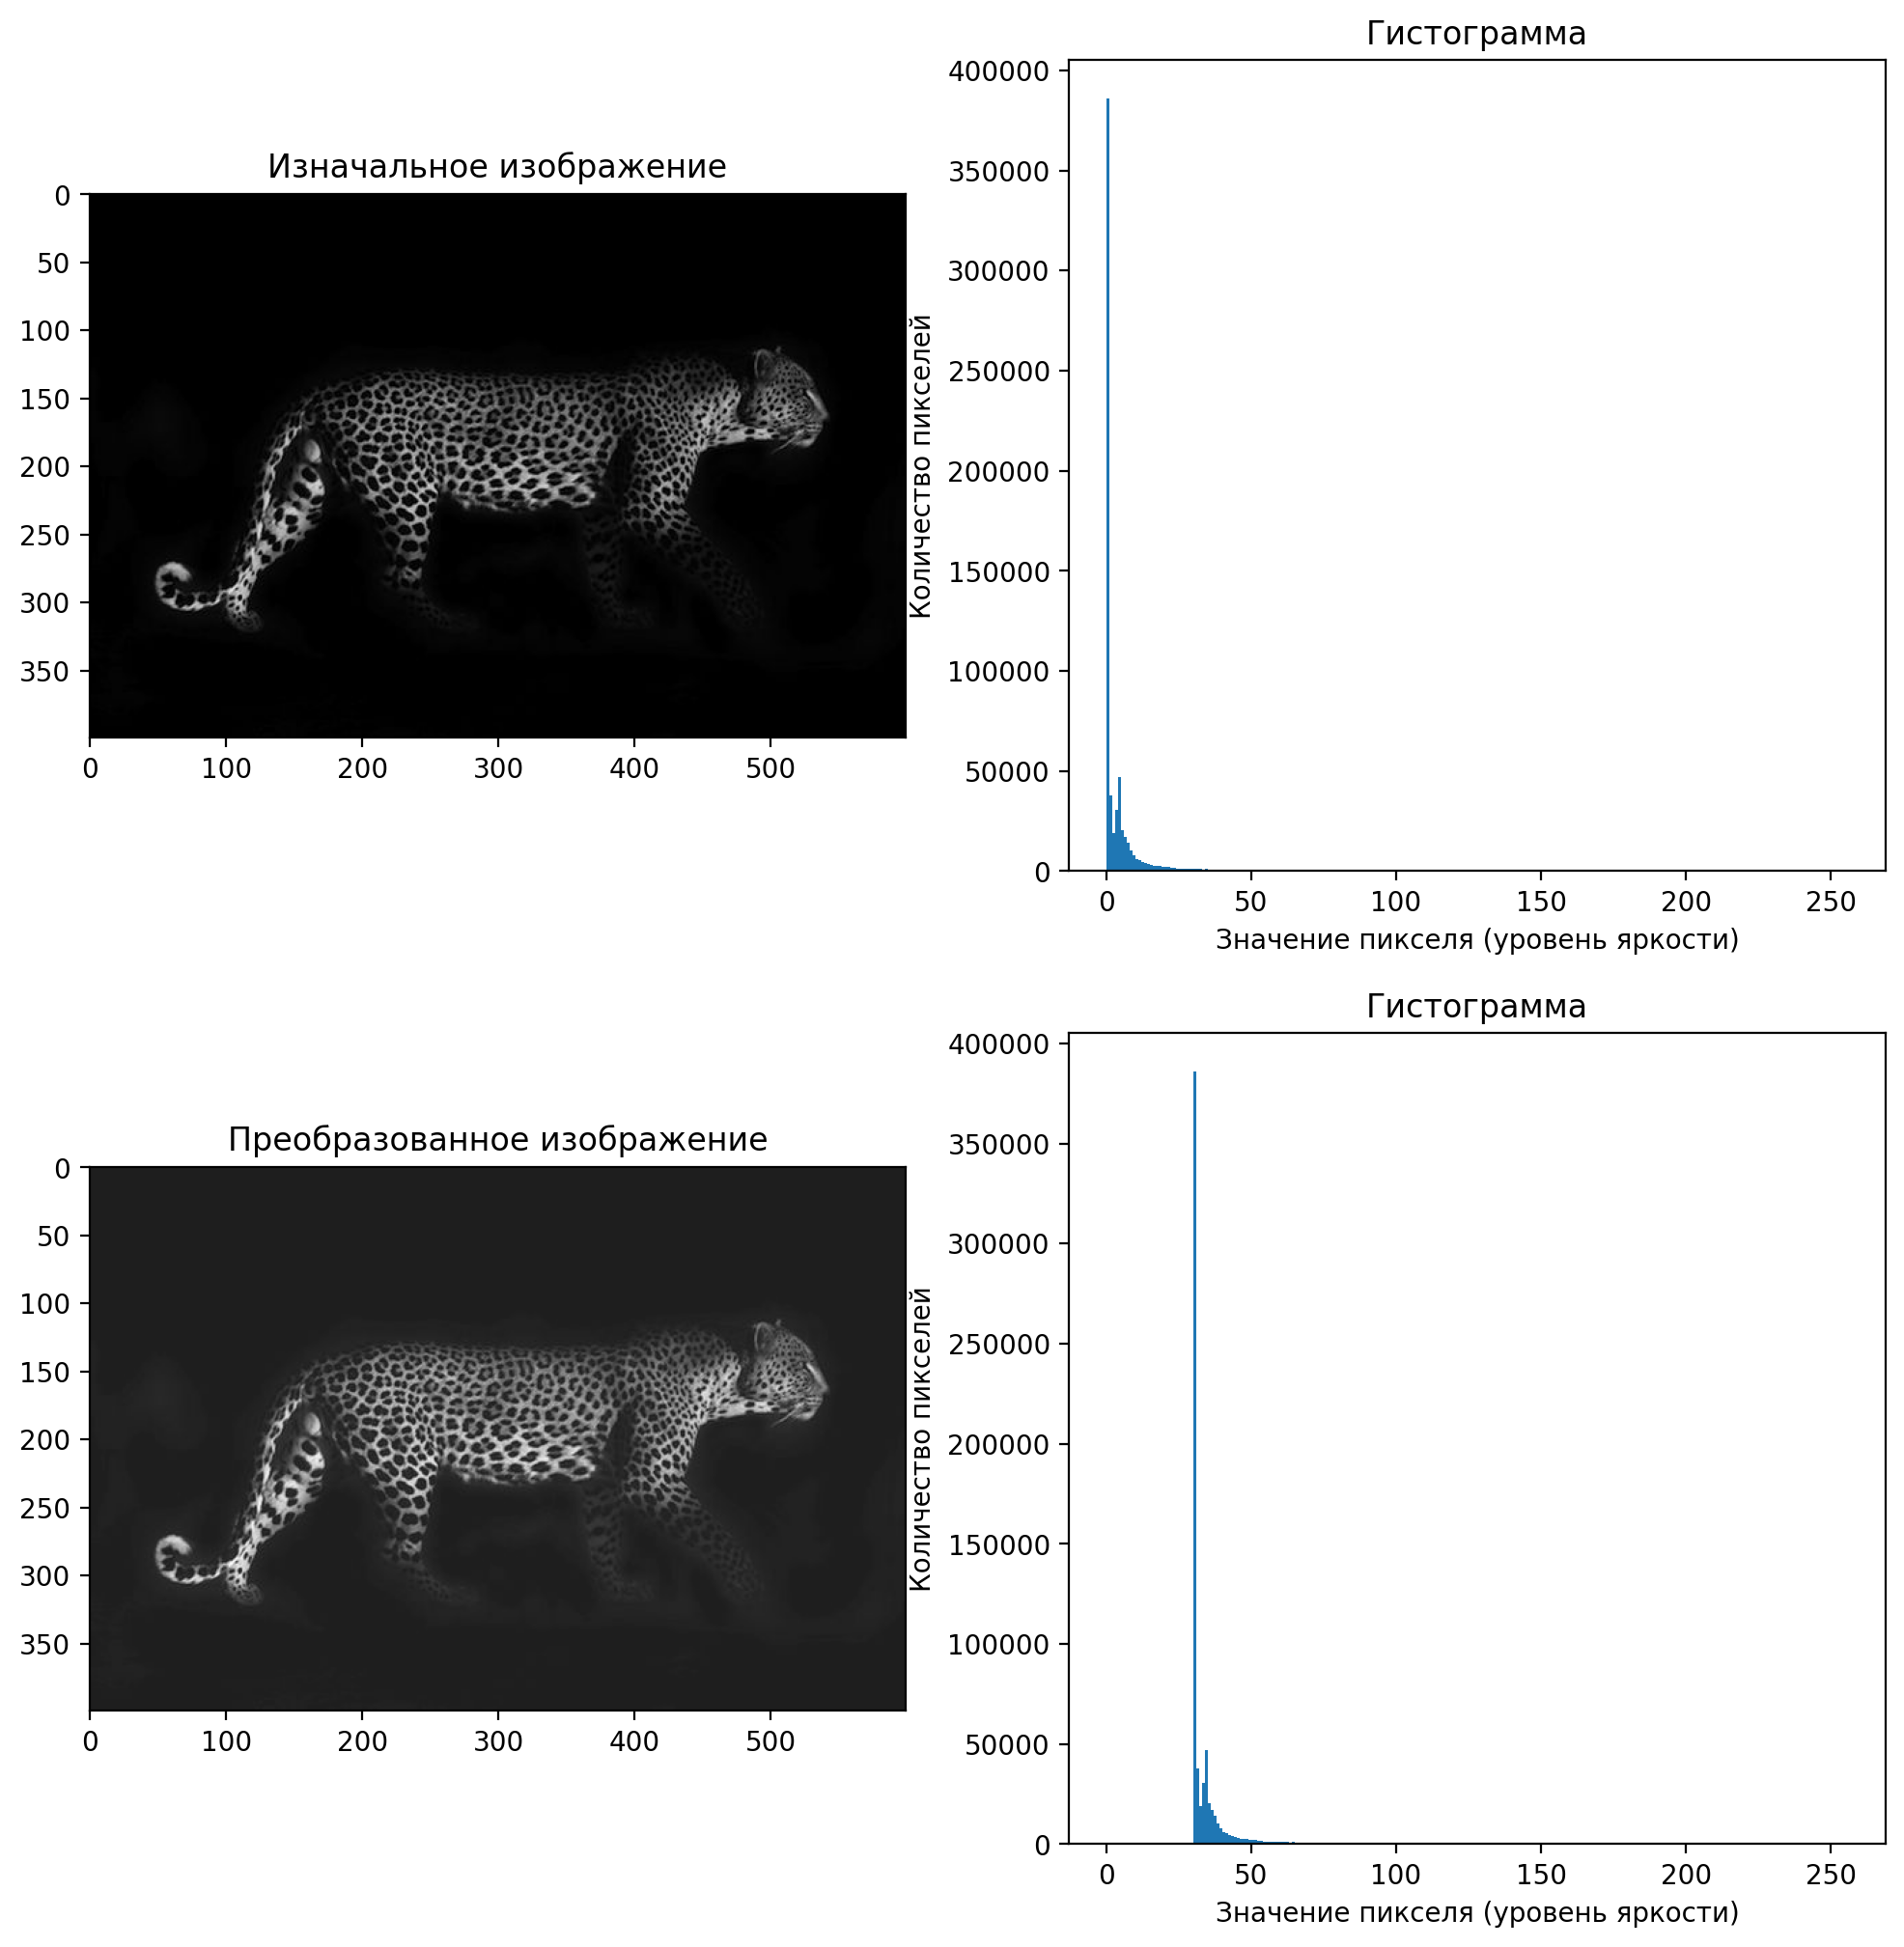

In [41]:
def lin(img, c):
    img = img.astype(np.int32)
    img = img + c
    img[img>255] = 255
    img[img<0] = 0
    return img

b2r('img4.jpeg', lin, c=30)

Функция сначала преобразует тип элементов массива img к типу np.int32. Затем к каждому пикселю добавляется значение c. Результат преобразования может содержать значения, выходящие за пределы диапазона от 0 до 255, поэтому значения пикселей, превышающие 255, устанавливаются на значение 255, а значения, меньшие 0, устанавливаются на 0.

Функция возвращает измененный массив img, имеющий тип np.int32.

Результаты вызова функции b2r('img4.jpeg', lin, c=30) будут отображены на графиках, которые строятся в функции b2r. Эти графики покажут изначальное цветное изображение, преобразованное изображение после применения линейного преобразования, а также гистограммы для обоих изображений.

Таким образом, функция lin позволяет выполнить линейное преобразование для цветного изображения путем добавления значения c ко всем пикселям. Это может быть полезно для увеличения яркости изображения или для изменения контрастности изображения. Однако при использовании этой функции следует помнить, что она может привести к потере информации при выходе за пределы диапазона значений от 0 до 255.